In [131]:
import numpy as np
from matplotlib import pyplot as plt
import mylibrary as ml

In [132]:
# Setting values for constants
eta_T = 4e-3    # just a typical magnetic diffusivity
t_max = 500     # time for which to run sinmulations
z_min = -1.0    # lower side of disc
z_max = 1.0     # upper side of disc
dt = t_max/200  # time step size
dz = 0.01       # spatial step in z direction

# Case for D = 1

We proceed by setting D = -1 for the 3 seed fields from Task 1 

In [133]:
alpha = 0.04    # constant for alpha effect
q = 0.1         # q value
Omega = 0.4     # constant for omega effect

# Initial Conditions - I

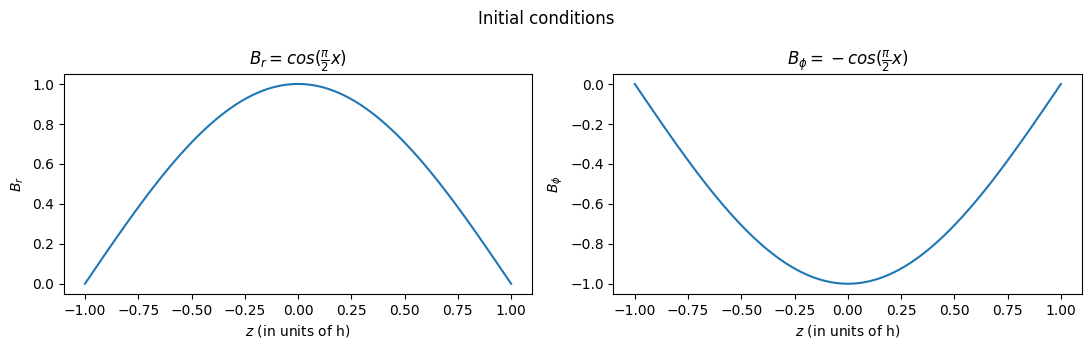

In [134]:
def init_cond_Br(x):
    return np.cos(np.pi/2*x)

def init_cond_Bphi(x):
    return -np.cos(np.pi/2*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(\frac{\pi}{2}x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(\frac{\pi}{2}x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [135]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

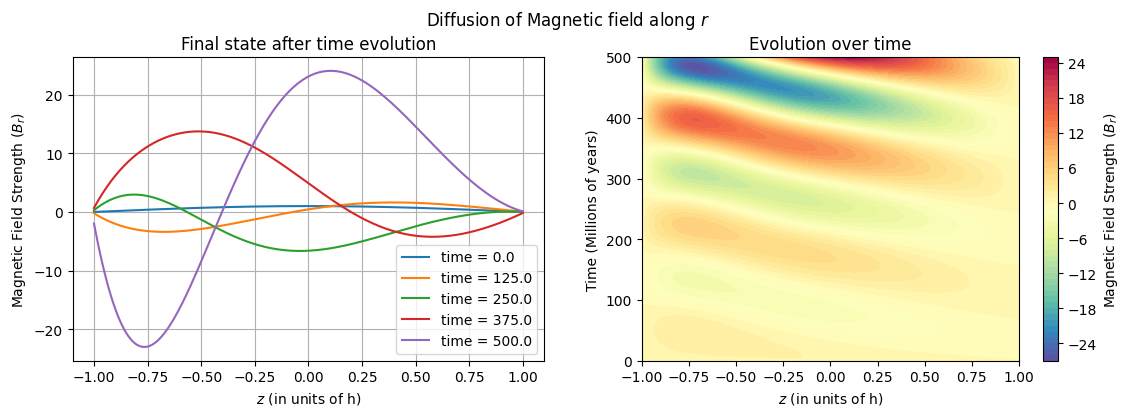

In [136]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

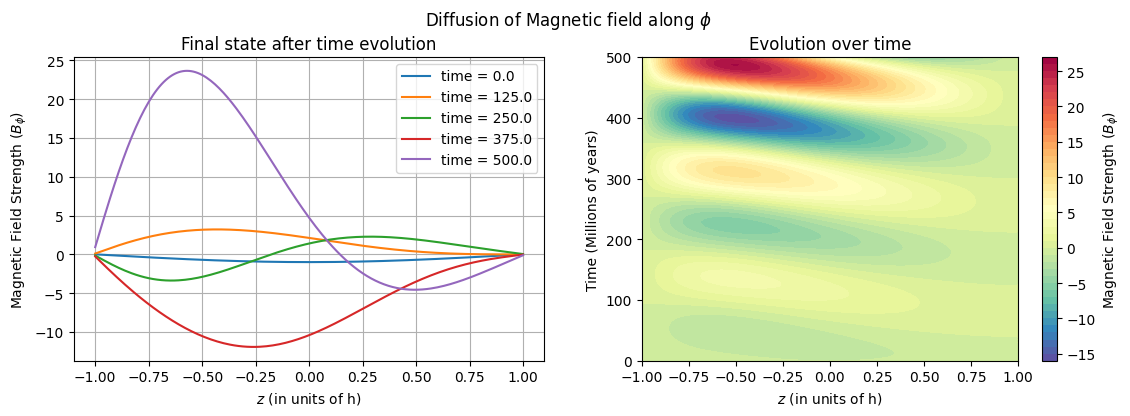

In [137]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

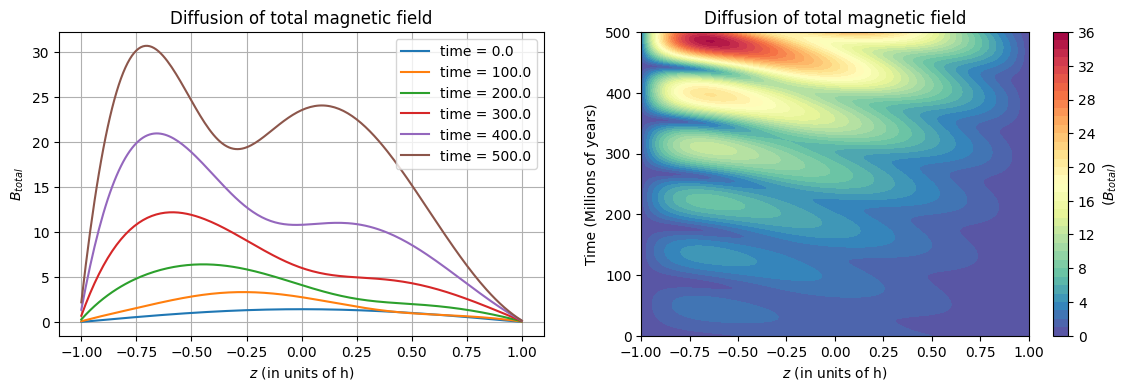

In [138]:
B_total, pitch = ml.get_B_and_pitch(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='Spectral_r')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

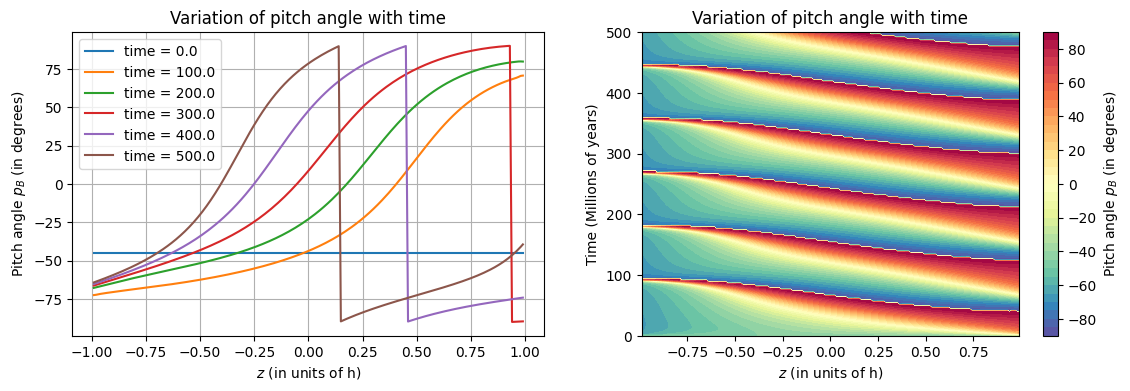

In [139]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='Spectral_r')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

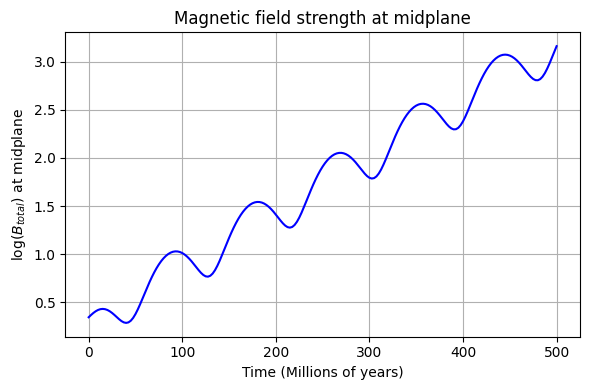

In [140]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at midplane')
plt.title(r'Magnetic field strength at midplane')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - II

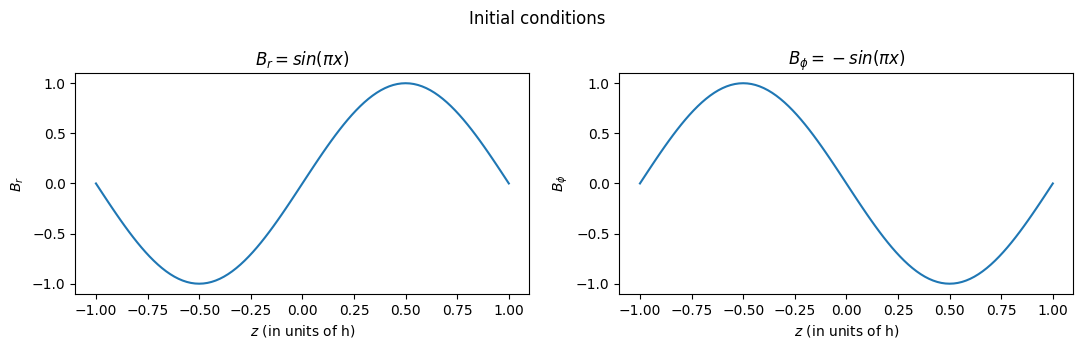

In [141]:
def init_cond_Br(x):
    return np.sin(np.pi*x)

def init_cond_Bphi(x):
    return -np.sin(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = sin(\pi x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -sin(\pi x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [142]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

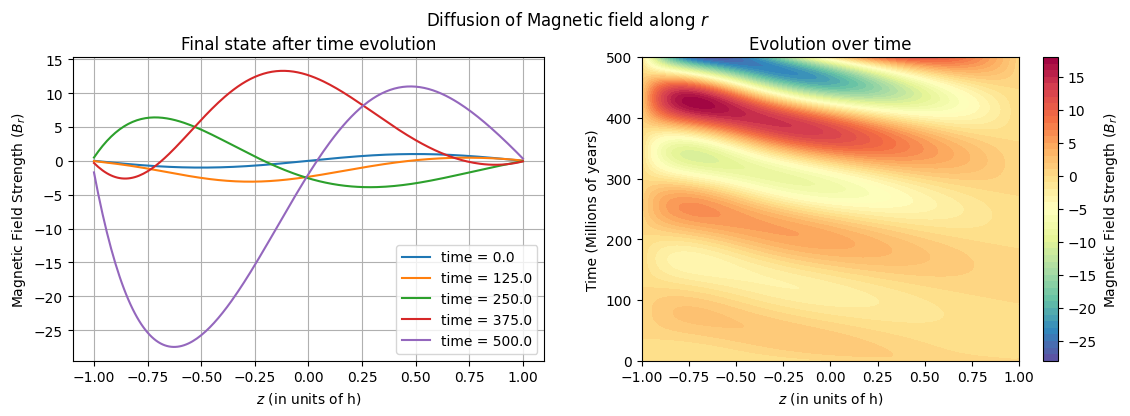

In [143]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

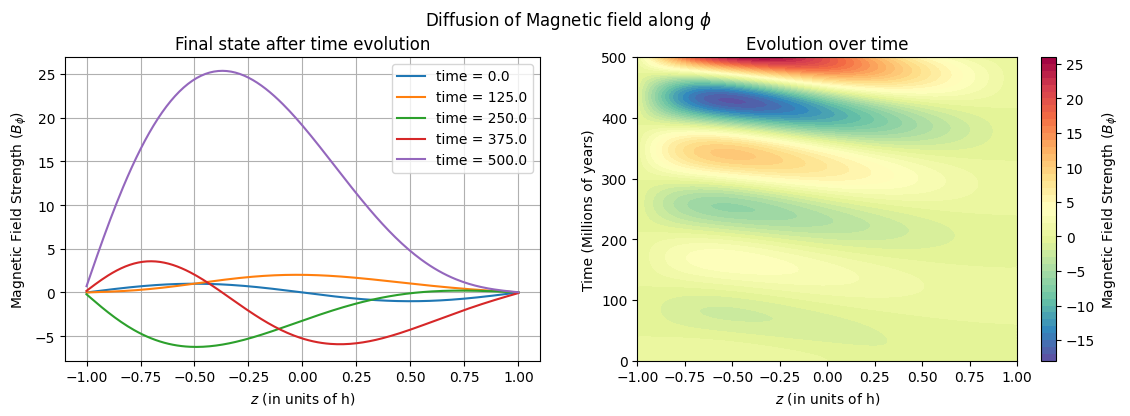

In [144]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

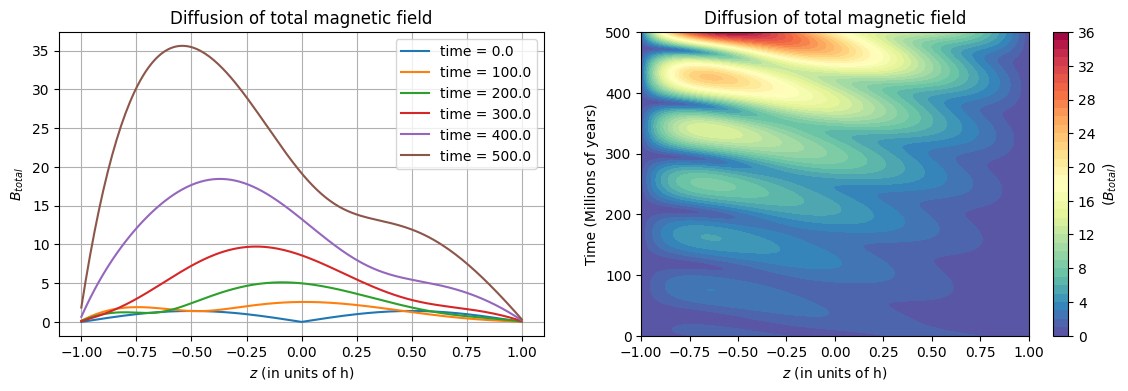

In [145]:
B_total, pitch = ml.get_B_and_pitch(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='Spectral_r')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

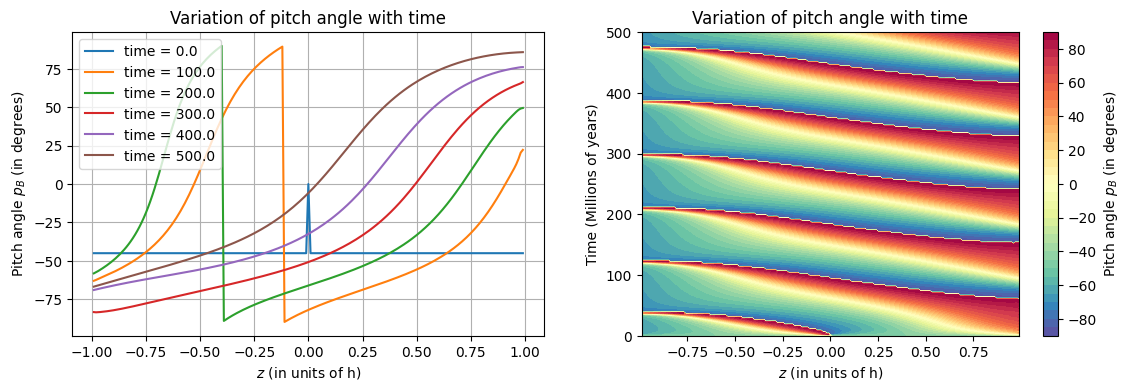

In [146]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='Spectral_r')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

C:\Users\Ratul\AppData\Local\Temp\ipykernel_2708\1936803863.py:2: RuntimeWarning: divide by zero encountered in log
  B_mid = np.log(B_total[int(len(z)/2), :])


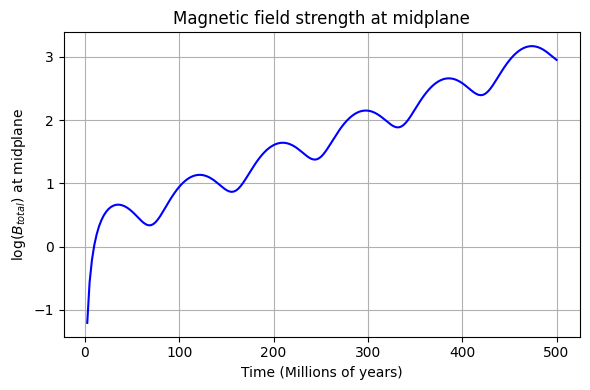

In [147]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at midplane')
plt.title(r'Magnetic field strength at midplane')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - III

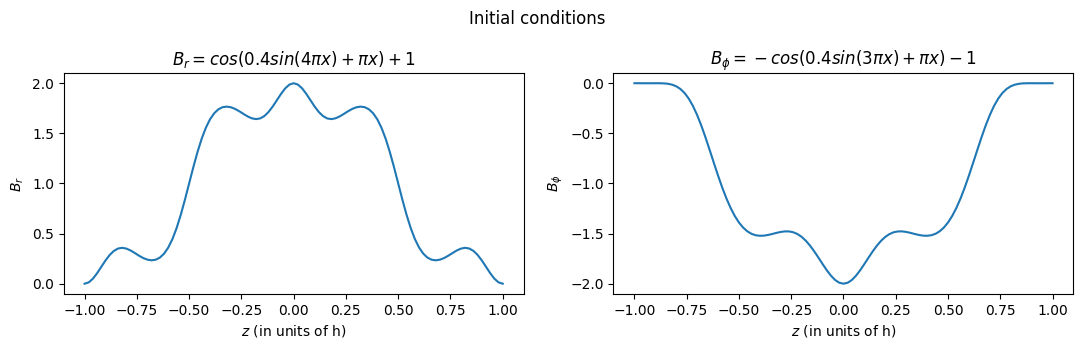

In [148]:
def init_cond_Br(x):
    return np.cos(0.4*np.sin(np.pi*4*(x)) + np.pi*(x))+1

def init_cond_Bphi(x):
    return -np.cos(0.4*np.sin(np.pi*3*(x)) + np.pi*(x))-1

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(0.4sin(4\pi x) + \pi x) + 1$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(0.4sin(3\pi x) + \pi x) - 1$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [149]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

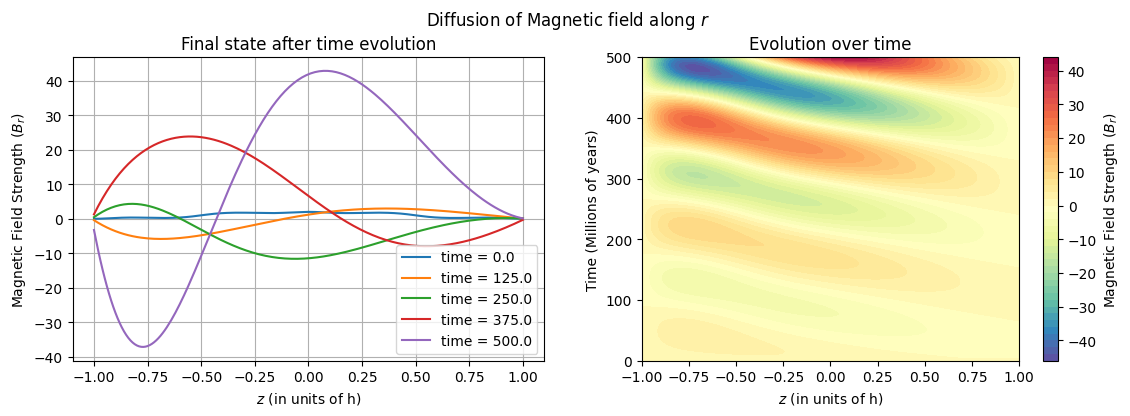

In [150]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

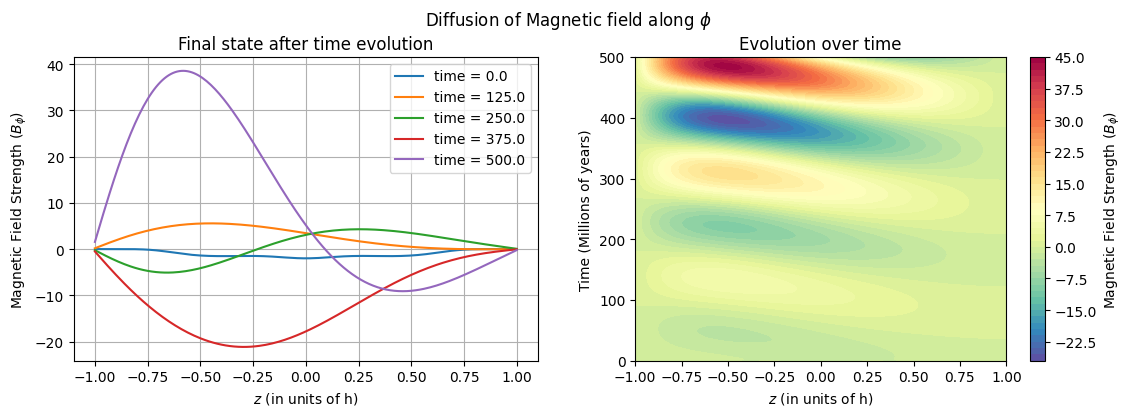

In [151]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

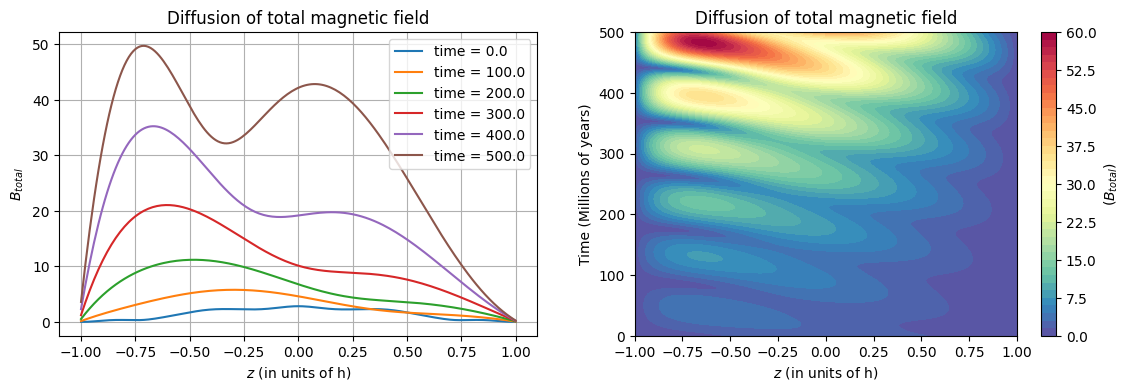

In [152]:
B_total, pitch = ml.get_B_and_pitch(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='Spectral_r')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

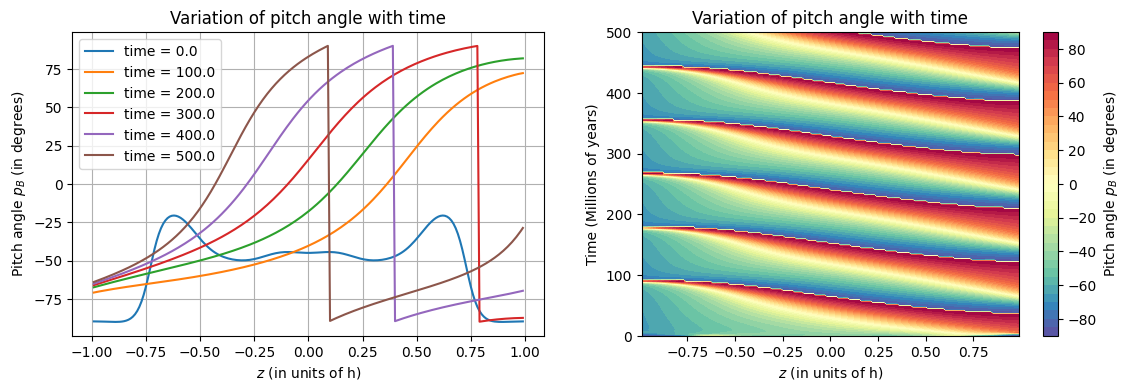

In [153]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='Spectral_r')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

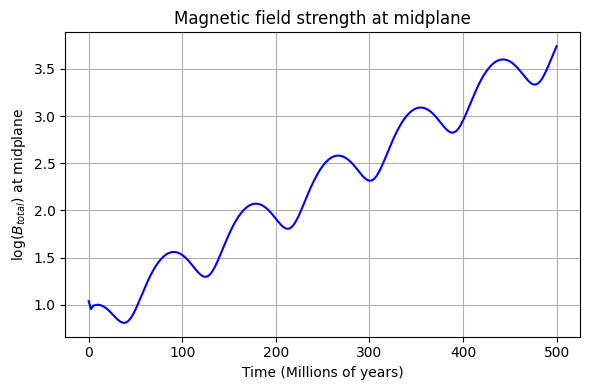

In [154]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at midplane')
plt.title(r'Magnetic field strength at midplane')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Case for D = 10

Now, we set D = 10 for the 3 seed fields and examine our results

In [155]:
alpha = 0.4    # constant for alpha effect
q = 0.1         # q value
Omega = 0.4     # constant for omega effect

# Initial Conditions - I

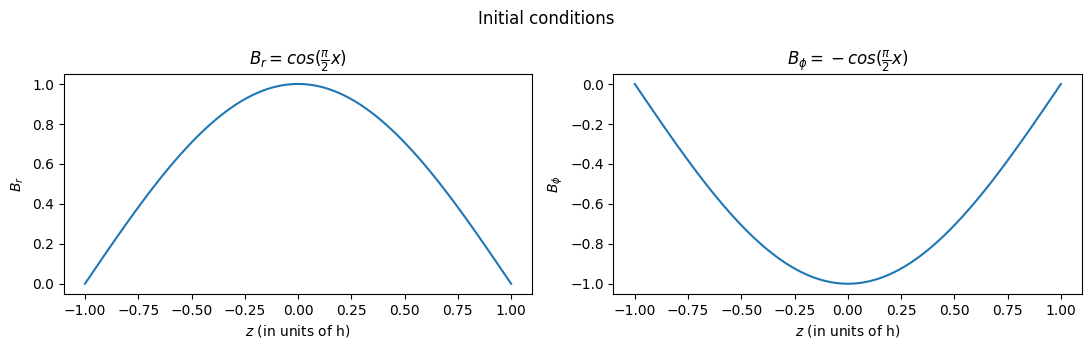

In [156]:
def init_cond_Br(x):
    return np.cos(np.pi/2*x)

def init_cond_Bphi(x):
    return -np.cos(np.pi/2*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(\frac{\pi}{2}x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(\frac{\pi}{2}x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [157]:
# Setting values for constants
eta_T = 4e-3    # just a typical magnetic diffusivity
t_max = 500     # time for which to run sinmulations (the unit is not strictly important)
z_min = -1.0    # lower side of disc
z_max = 1.0     # upper side of disc
dt = t_max/200  # time step size
dz = 0.01       # spatial step in z direction
alpha = 0.02    # constant for alpha effect
Omega = 0.4     # constant for omega effect
q = 0.1         # q value

# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

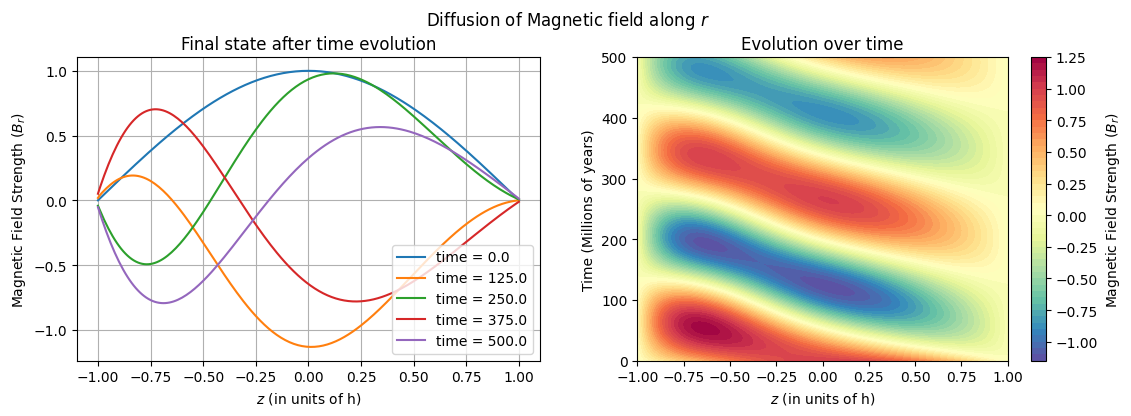

In [158]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

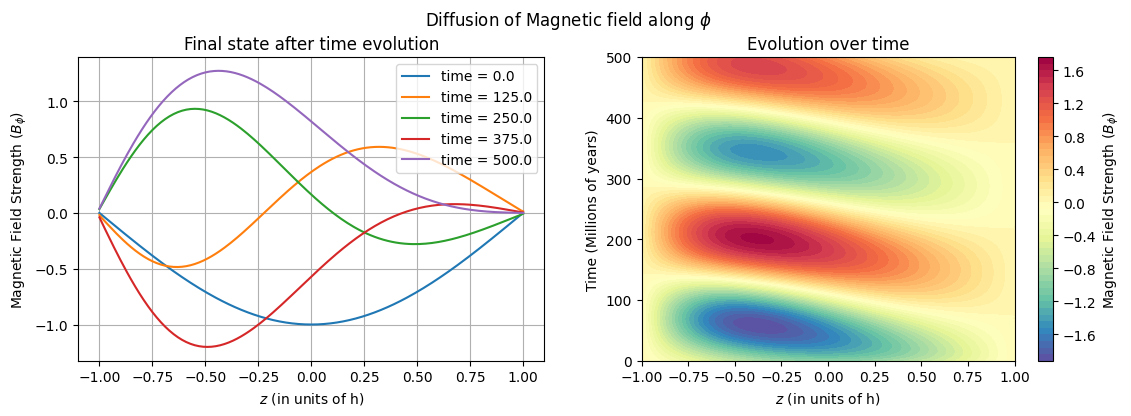

In [159]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

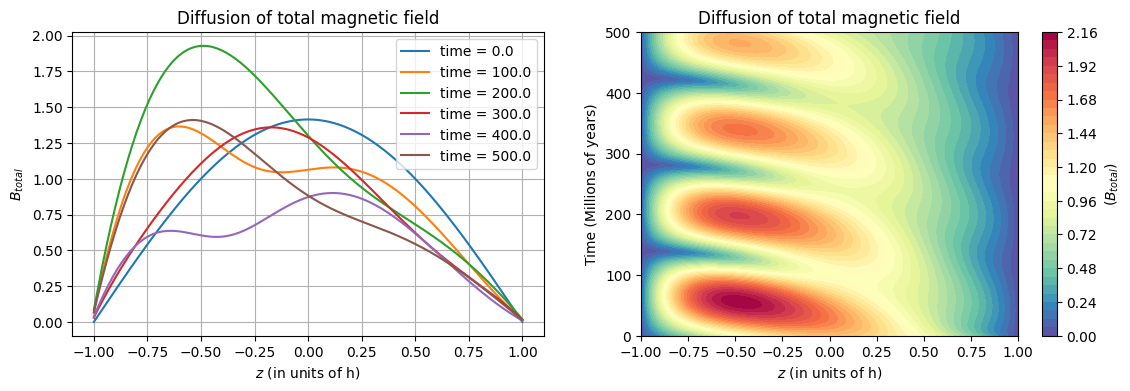

In [160]:
B_total, pitch = ml.get_B_and_pitch(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='Spectral_r')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

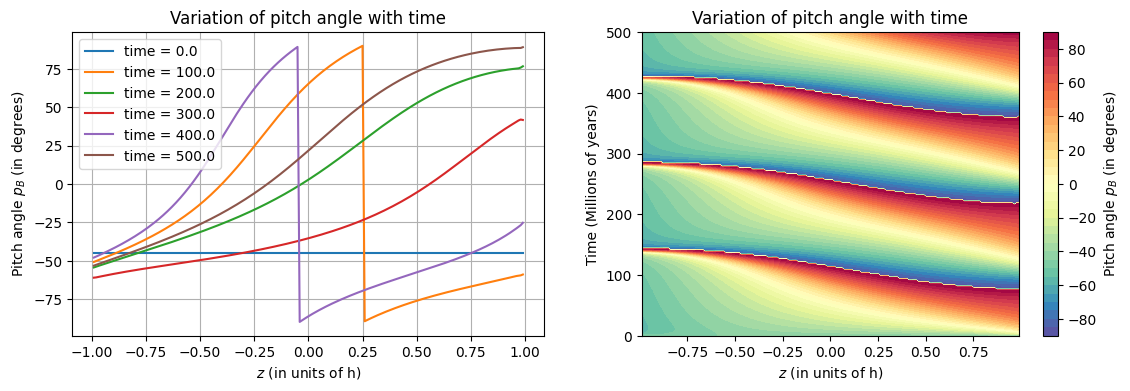

In [161]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='Spectral_r')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

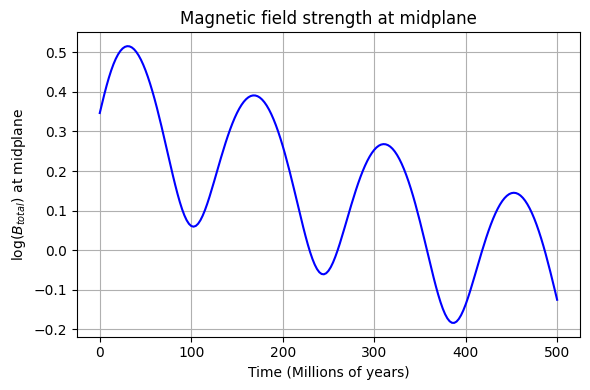

In [162]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at midplane')
plt.title(r'Magnetic field strength at midplane')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - II

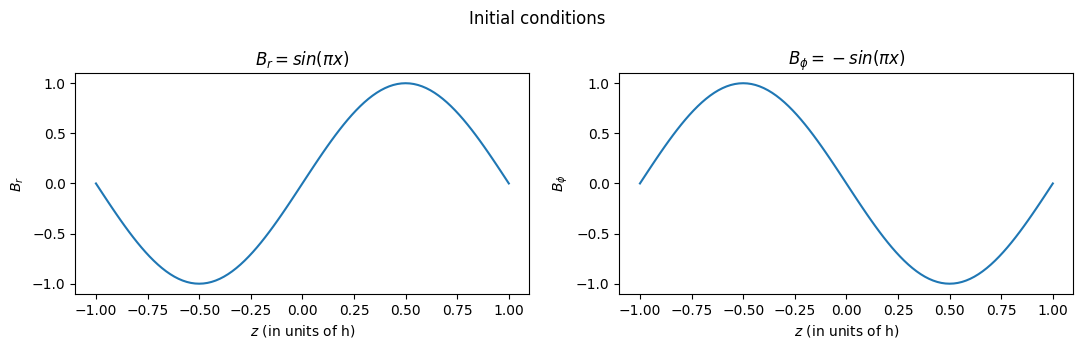

In [163]:
def init_cond_Br(x):
    return np.sin(np.pi*x)

def init_cond_Bphi(x):
    return -np.sin(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = sin(\pi x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -sin(\pi x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [164]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

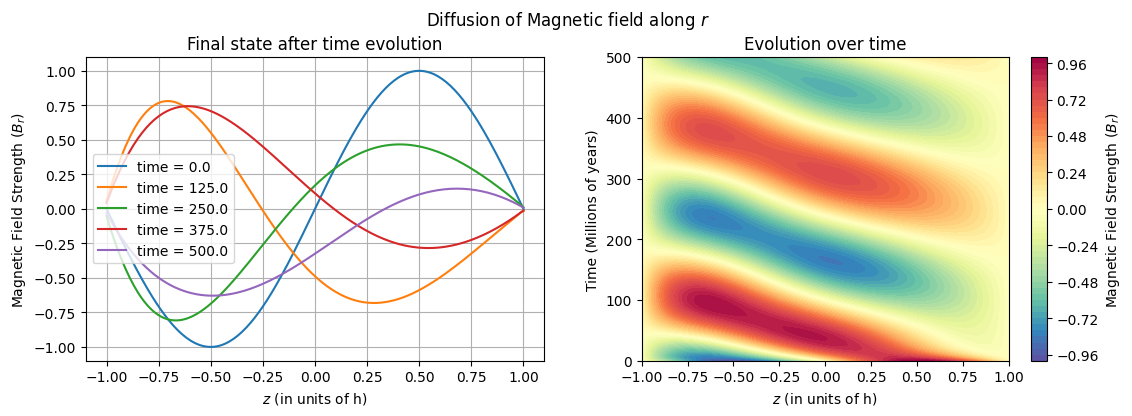

In [165]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

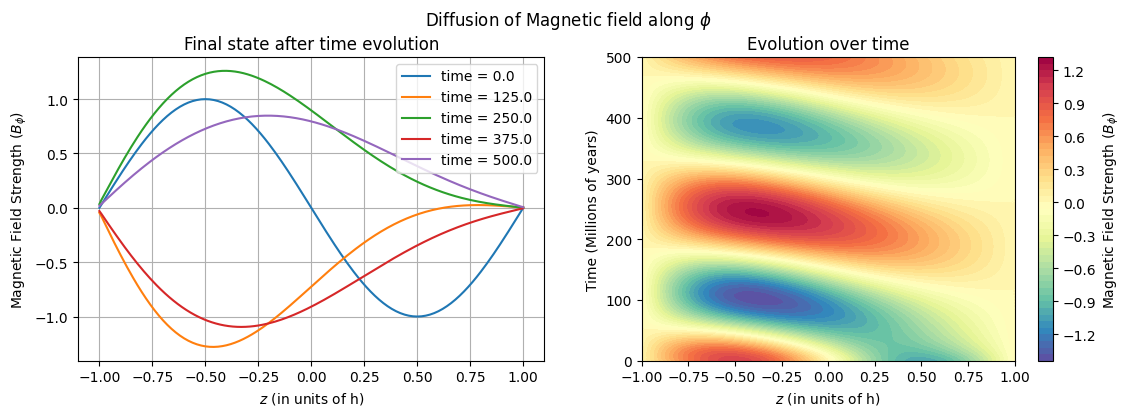

In [166]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

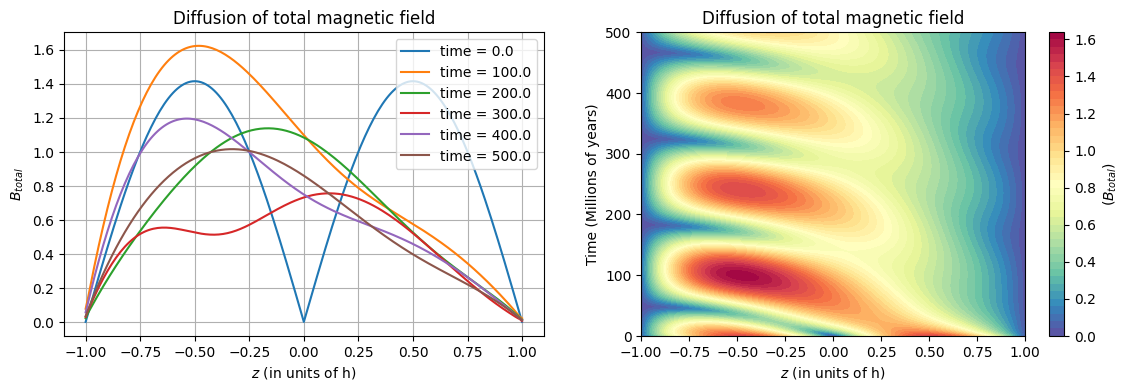

In [167]:
B_total, pitch = ml.get_B_and_pitch(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='Spectral_r')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

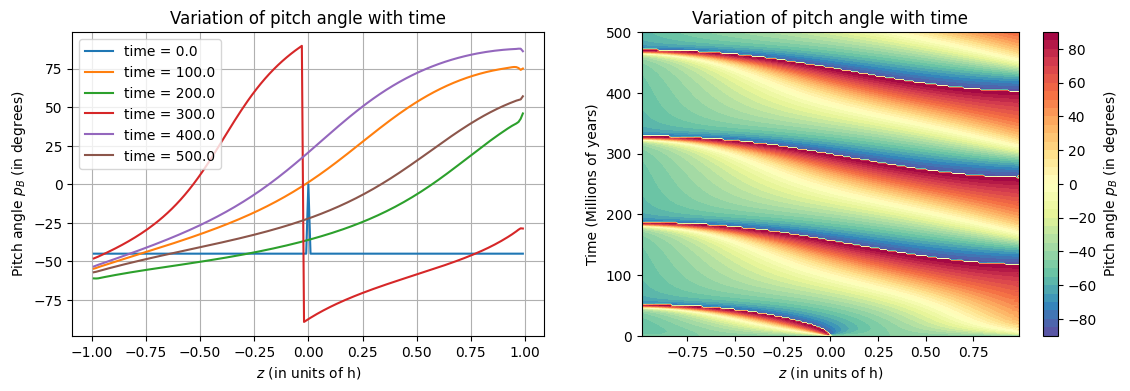

In [168]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='Spectral_r')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

C:\Users\Ratul\AppData\Local\Temp\ipykernel_2708\1936803863.py:2: RuntimeWarning: divide by zero encountered in log
  B_mid = np.log(B_total[int(len(z)/2), :])


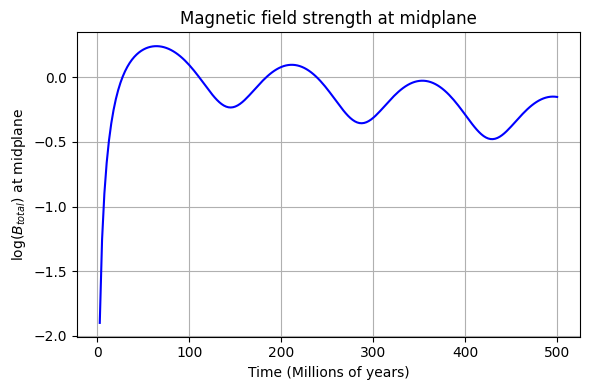

In [169]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at midplane')
plt.title(r'Magnetic field strength at midplane')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - III

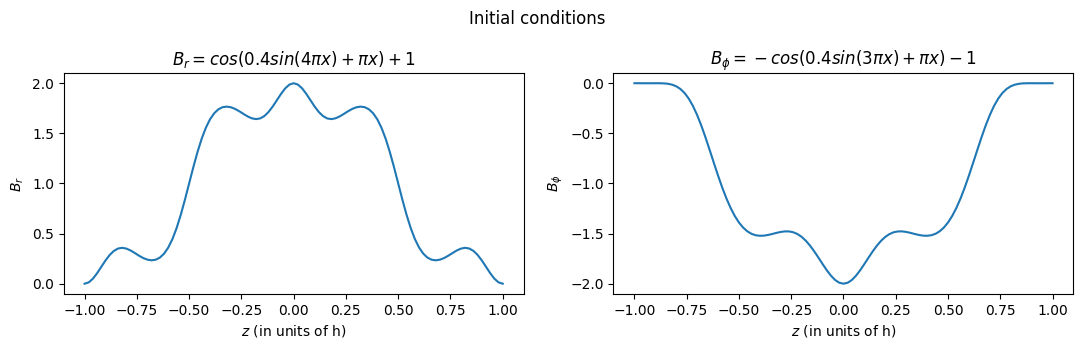

In [170]:
def init_cond_Br(x):
    return np.cos(0.4*np.sin(np.pi*4*(x)) + np.pi*(x))+1

def init_cond_Bphi(x):
    return -np.cos(0.4*np.sin(np.pi*3*(x)) + np.pi*(x))-1

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(0.4sin(4\pi x) + \pi x) + 1$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(0.4sin(3\pi x) + \pi x) - 1$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [171]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

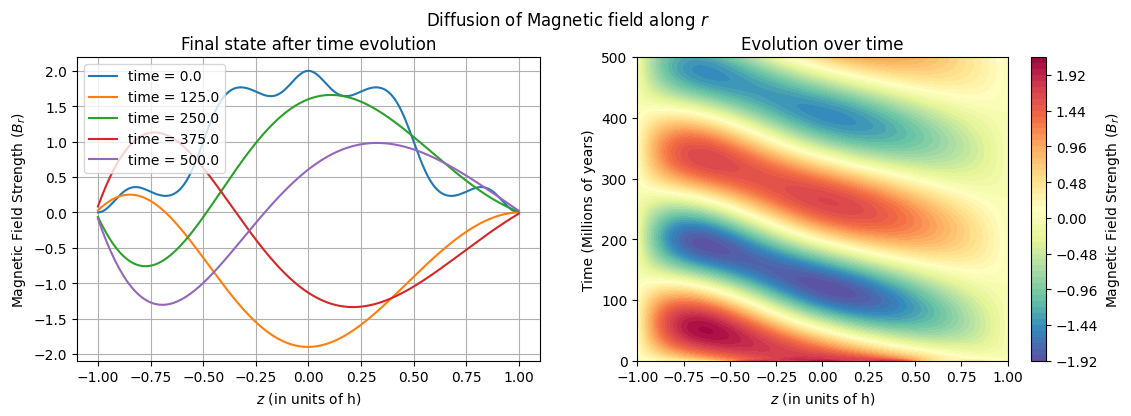

In [172]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

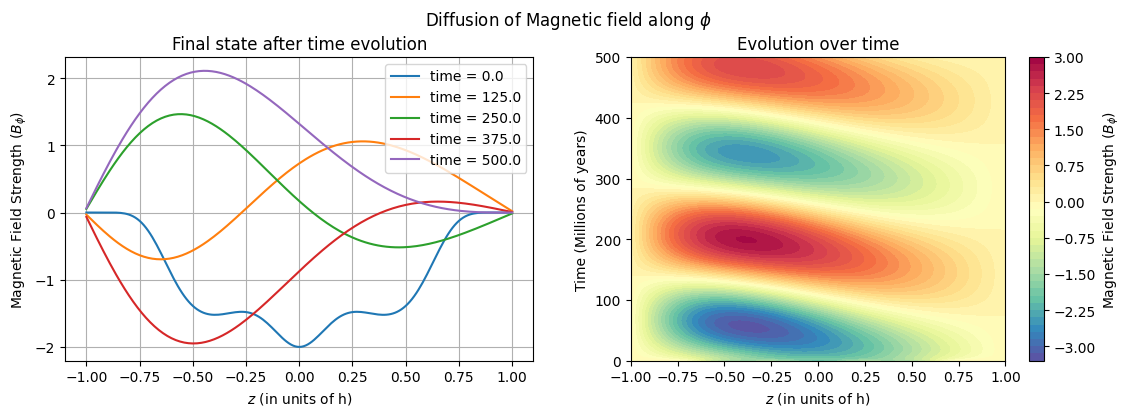

In [173]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='Spectral_r')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

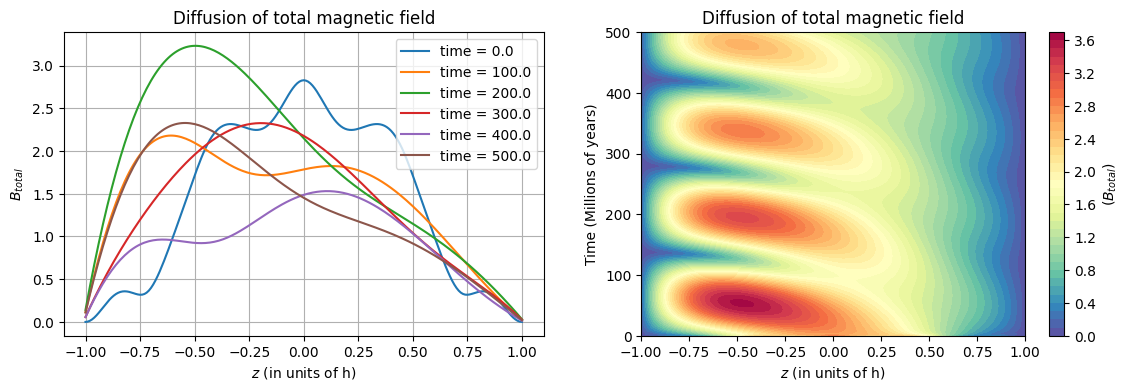

In [174]:
B_total, pitch = ml.get_B_and_pitch(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='Spectral_r')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

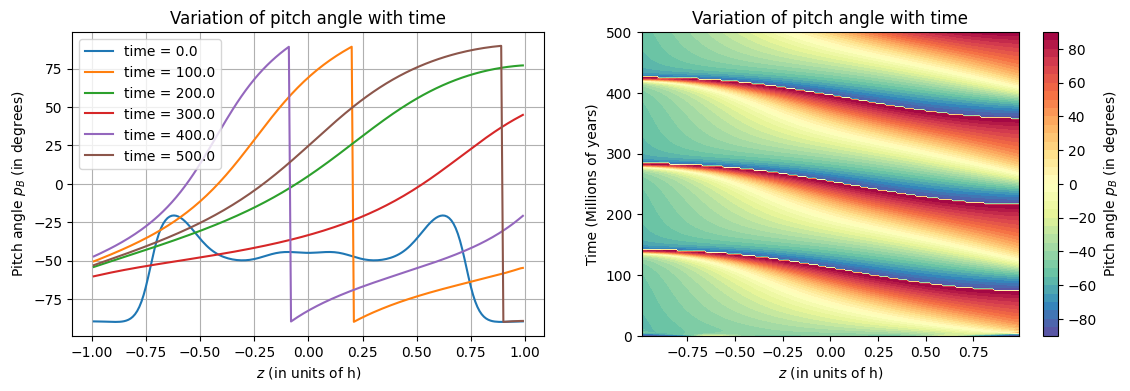

In [175]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='Spectral_r')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

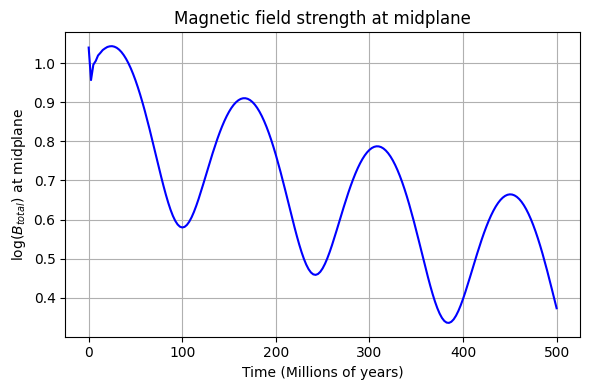

In [176]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at midplane')
plt.title(r'Magnetic field strength at midplane')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()